what is kernel density estimation means?

Kernel Density Estimation (KDE) is a non-parametric statistical technique used to estimate the probability density function of a random variable

suppose u have some data and want to visualize it to understand its distribution, the common method is to plot a histogram. but histograms doesn't provide smooth curves and is looks different for different bin choices. below we will see the difference between both

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('bmh')
%matplotlib inline

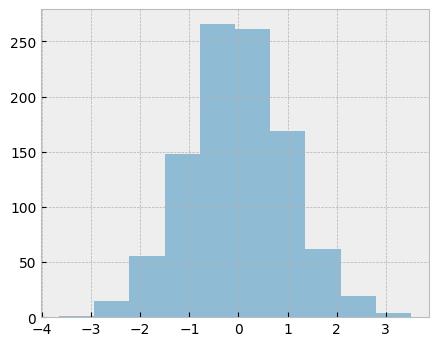

In [2]:
ds = np.random.randn(1000)
plt.figure(figsize=(5, 4))
plt.hist(ds, bins=10, alpha=0.5, label='Histogram')
plt.show()

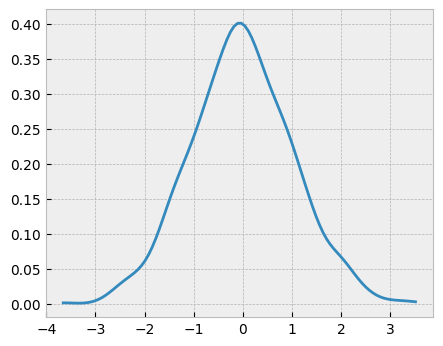

In [3]:
# plot kde
from scipy.stats import gaussian_kde
kde = gaussian_kde(ds)
x_values = np.linspace(ds.min(), ds.max(), 100)
plt.figure(figsize=(5, 4))
plt.plot(x_values, kde(x_values), label='KDE')
plt.show()

> lets plot kde by implementing one of our own. 

- get a grid of values on x-axis
- for a given data point, calculate gaussian values at all the data points using a `\sigma` value. (below it is named as bandwidth)
- repeat this for all points 
- sum all these points 

In [4]:
def gaussian_kernel(x):
    """Gaussian kernel function"""
    return (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * x**2)

def kde_from_scratch(data, x_grid, bandwidth):
    """
    Compute KDE from scratch
    
    Parameters:
    data: array of data points
    x_grid: points where to evaluate the density
    bandwidth: smoothing parameter
    
    Returns:
    estimated density at each point in x_grid
    """
    n = len(data)
    kde = np.zeros(len(x_grid))
    
    for i in range(n):
        # For each data point, compute its contribution to the density
        # at each point in the x_grid
        kernel_values = gaussian_kernel((x_grid - data[i]) / bandwidth)
        kde += kernel_values
    
    # Normalize by the number of points and bandwidth
    kde = kde / (n * bandwidth)
    
    return kde

In [5]:
x_grid = np.linspace(min(ds) - 1, max(ds) + 1, 1000)
x_grid.shape

(1000,)

In [6]:
kde = kde_from_scratch(ds, x_grid, bandwidth=1)

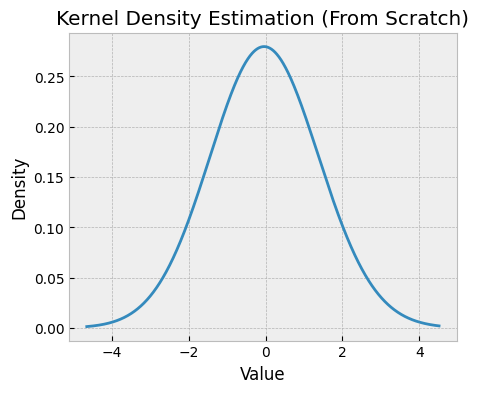

In [7]:
plt.figure(figsize=(5, 4))
plt.plot(x_grid, kde)
plt.title("Kernel Density Estimation (From Scratch)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

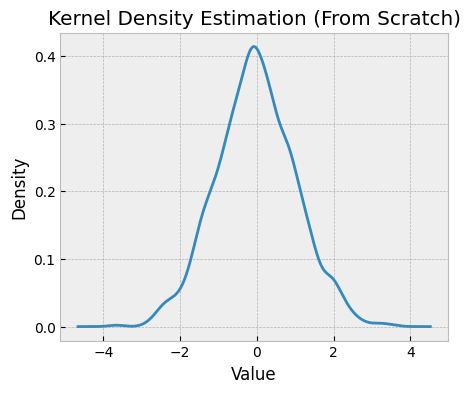

In [8]:
kde = kde_from_scratch(ds, x_grid, bandwidth=0.2)
plt.figure(figsize=(5, 4))
plt.plot(x_grid, kde)
plt.title("Kernel Density Estimation (From Scratch)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()